<a href="https://colab.research.google.com/github/Bouchrikator/sic-/blob/main/Check_point2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib 

1.Preprocessing phase:

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

In [5]:
df=pd.read_csv('titanic-passengers.csv',sep=';')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
dfa=df['Age'].mean()
df['Age'].fillna(dfa,inplace=True)
df['Cabin'].fillna('G6',inplace=True)
df['Embarked'].fillna('S',inplace=True)
df['Cabin'].value_counts()

G6             691
C23 C25 C27      4
B96 B98          4
D                3
C22 C26          3
              ... 
D45              1
F G63            1
A34              1
C85              1
E63              1
Name: Cabin, Length: 147, dtype: int64

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

2. Visualization phase

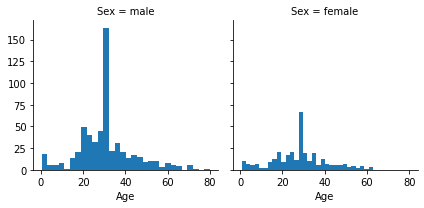

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=30)

In [10]:
df['Pclass']

0      2
1      3
2      3
3      3
4      1
      ..
886    2
887    3
888    3
889    3
890    2
Name: Pclass, Length: 891, dtype: int64

In [48]:
df["Survived_ratio"]= encoder.fit_transform(df["Survived"])
df['Sex_ratio'].corr(df['Survived_ratio'])
encoder = LabelEncoder()
df['Survived_ratio'].corr(df['Sex_ratio'])
df['Survived_ratio'].corr(df['Age'])

-0.06980851528714313

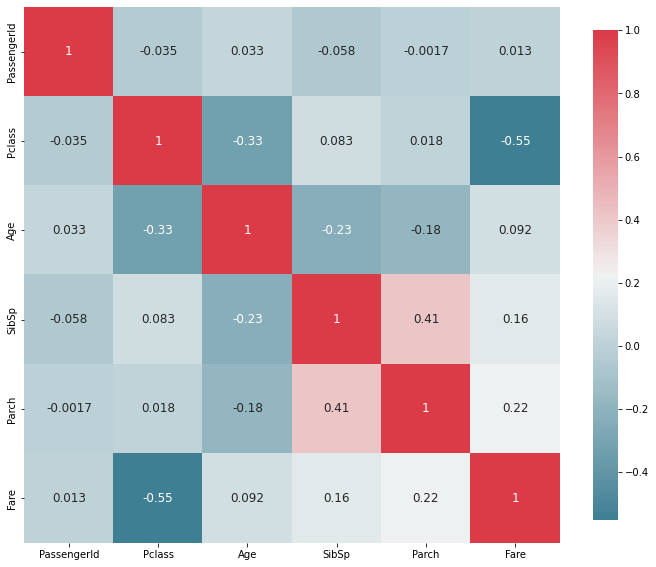

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,G6,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,G6,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,G6,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,G6,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,G6,S


In [13]:
df.groupby('Survived')['Pclass'].agg(['mean'])

,mean
Survived,
No,2.531876
Yes,1.950292


In [14]:
type(df['Name'])

pandas.core.series.Series

In [15]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mr",

                    "Master" :    "Master"

                    }
df2 = df['Name'].str.split(",",n=1, expand = True)
df['dj']=df2[0]
df['jd']=df2[1]

df2.drop(columns=0)
df3=df2[1].str.split(".",n=1, expand = True)
df['dj']=df3[0]
df['jd']=df3[1]
df3.drop(columns=1)

df.drop(columns=['Name','jd'],inplace=True)
df.rename(columns = {'dj':'Title_Dictionary'}, inplace = True)
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dictionary
0,343,No,2,male,28.000000,0,0,248740,13.0000,G6,S,Mr
1,76,No,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.000000,0,0,350050,7.8542,G6,S,Mr
3,568,No,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,61,No,3,male,22.000000,0,0,2669,7.2292,G6,C,Mr
888,535,No,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss
889,102,No,3,male,29.699118,0,0,349215,7.8958,G6,S,Mr


In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dictionary
0,343,No,2,male,28.000000,0,0,248740,13.0000,G6,S,Mr
1,76,No,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.000000,0,0,350050,7.8542,G6,S,Mr
3,568,No,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs
887,61,No,3,male,22.000000,0,0,2669,7.2292,G6,C,Mr
888,535,No,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss
889,102,No,3,male,29.699118,0,0,349215,7.8958,G6,S,Mr


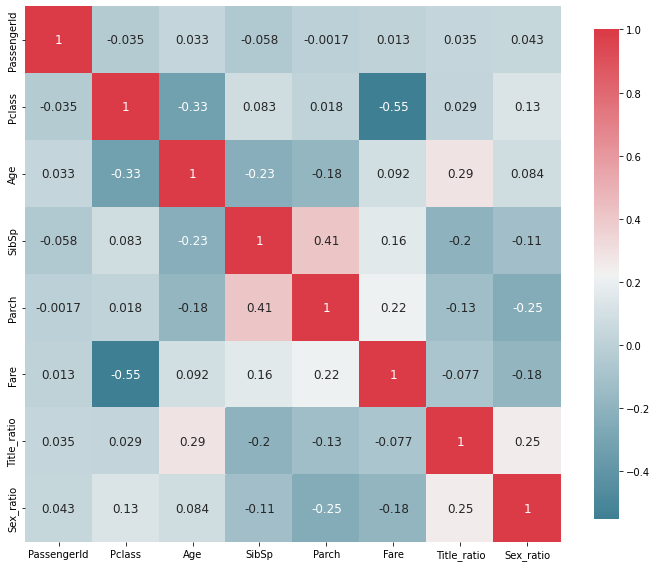

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Title_ratio"]= encoder.fit_transform(df["Title_Dictionary"])
df["Sex_ratio"]= encoder.fit_transform(df["Sex"])

plot_correlation_map(df)

In [18]:
df['familly_size']=df['Parch']+df['SibSp']
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
0,343,No,2,male,28.000000,0,0,248740,13.0000,G6,S,Mr,11,1,0
1,76,No,3,male,25.000000,0,0,348123,7.6500,F G73,S,Mr,11,1,0
2,641,No,3,male,20.000000,0,0,350050,7.8542,G6,S,Mr,11,1,0
3,568,No,3,female,29.000000,0,4,349909,21.0750,G6,S,Mrs,12,0,4
4,672,No,1,male,31.000000,1,0,F.C. 12750,52.0000,B71,S,Mr,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,1,0,237736,30.0708,G6,C,Mrs,12,0,1
887,61,No,3,male,22.000000,0,0,2669,7.2292,G6,C,Mr,11,1,0
888,535,No,3,female,30.000000,0,0,315084,8.6625,G6,S,Miss,8,0,0
889,102,No,3,male,29.699118,0,0,349215,7.8958,G6,S,Mr,11,1,0


In [29]:
df[['Survived','familly_size']]

,Survived,familly_size
0,No,0
1,No,0
2,No,0
3,No,4
4,No,1
...,...,...
886,Yes,1
887,No,0
888,No,0
889,No,0


In [36]:
df[(df['Survived']=='Yes')&(df['familly_size']>0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
7,382,Yes,3,female,1.0,0,2,2653,15.7417,G6,C,Miss,8,0,2
9,433,Yes,2,female,42.0,1,0,SC/AH 3085,26.0000,G6,S,Mrs,12,0,1
12,755,Yes,2,female,48.0,1,2,220845,65.0000,G6,S,Mrs,12,0,3
19,225,Yes,1,male,38.0,1,0,19943,90.0000,C93,S,Mr,11,1,1
22,544,Yes,2,male,32.0,1,0,2908,26.0000,G6,S,Mr,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,184,Yes,2,male,1.0,2,1,230136,39.0000,F4,S,Master,7,1,3
857,514,Yes,1,female,54.0,1,0,PC 17603,59.4000,G6,C,Mrs,12,0,1
862,619,Yes,2,female,4.0,2,1,230136,39.0000,F4,S,Miss,8,0,3
882,775,Yes,2,female,54.0,1,3,29105,23.0000,G6,S,Mrs,12,0,4


In [41]:
df[(df['Survived']=='No')&(df['familly_size']>0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Dictionary,Title_ratio,Sex_ratio,familly_size
3,568,No,3,female,29.0,0,4,349909,21.0750,G6,S,Mrs,12,0,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,11,1,1
5,105,No,3,male,37.0,2,0,3101276,7.9250,G6,S,Mr,11,1,2
13,595,No,2,male,37.0,1,0,SC/AH 29037,26.0000,G6,S,Mr,11,1,1
16,378,No,1,male,27.0,0,2,113503,211.5000,C82,C,Mr,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,206,No,3,female,2.0,0,1,347054,10.4625,G6,S,Miss,8,0,1
867,737,No,3,female,48.0,1,3,W./C. 6608,34.3750,G6,S,Mrs,12,0,4
874,60,No,3,male,11.0,5,2,CA 2144,46.9000,G6,S,Master,7,1,7
876,375,No,3,female,3.0,3,1,349909,21.0750,G6,S,Miss,8,0,4


from what we have observed from this data the familly size do not inflluence the survived feature so it's not useful in our case
